# kNN classifier

## Liiketoiminnan ymmärrys
Tämän data-analyysin tavoitteena on käyttää koneoppimisalgoritmia, jotta voidaan ennustaa, onko potilas sairastunut rintasyöpään. Toivotaan, että malli tuottaisi n. 90% tarkkuudella oikeita tuloksia.

## Datan ymmärrys
Ominaisuudet lasketaan rintakasvaimen hienoneulabiopsian digitalisoidusta kuvasta. Ne kuvaavat kuvassa olevien solujen tumien ominaisuuksia.
* radius: Etäisyyksien keskiarvo keskeltä reunan pisteisiin
* texture: Harmaasävyarvojen keskihajonta
* perimeter: Ympärysmitta
* area: Pinta-ala
* smoothness: Paikallinen vaihtelevuus säteen pituuksissa
* compactness: (Ympärysmitta^2 / pinta-ala - 1)
* concavity: Korkeuskäyrän koverien osien koveruus
* concave points: Korkeuskäyrän koverien osien määrä
* symmetry: Symmetria
* fractal dimension: Fraktaalimitta

In [1]:
from ucimlrepo import fetch_ucirepo


# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

X["Diagnosis"] = y.copy()

X

C:\Users\aapos\AppData\Local\Temp\ipykernel_11940\239183456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Diagnosis"] = y.copy()


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


Tarkistamme `describe` metodissa onko datassa virheellisiä tai omituisia arvoja, jotka pitäis ottaa huomioon. Kaikki arvot näyttävät normaalilta ja dataframen arvot ovat
float-tyyppisiä. Tehdään vielä toinen tarkistus `matplotlibillä`, koska poikkeavat arvot on helpompi huomata visuaalisessa muodossa. 

In [2]:
X.describe(include='all')


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,357
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


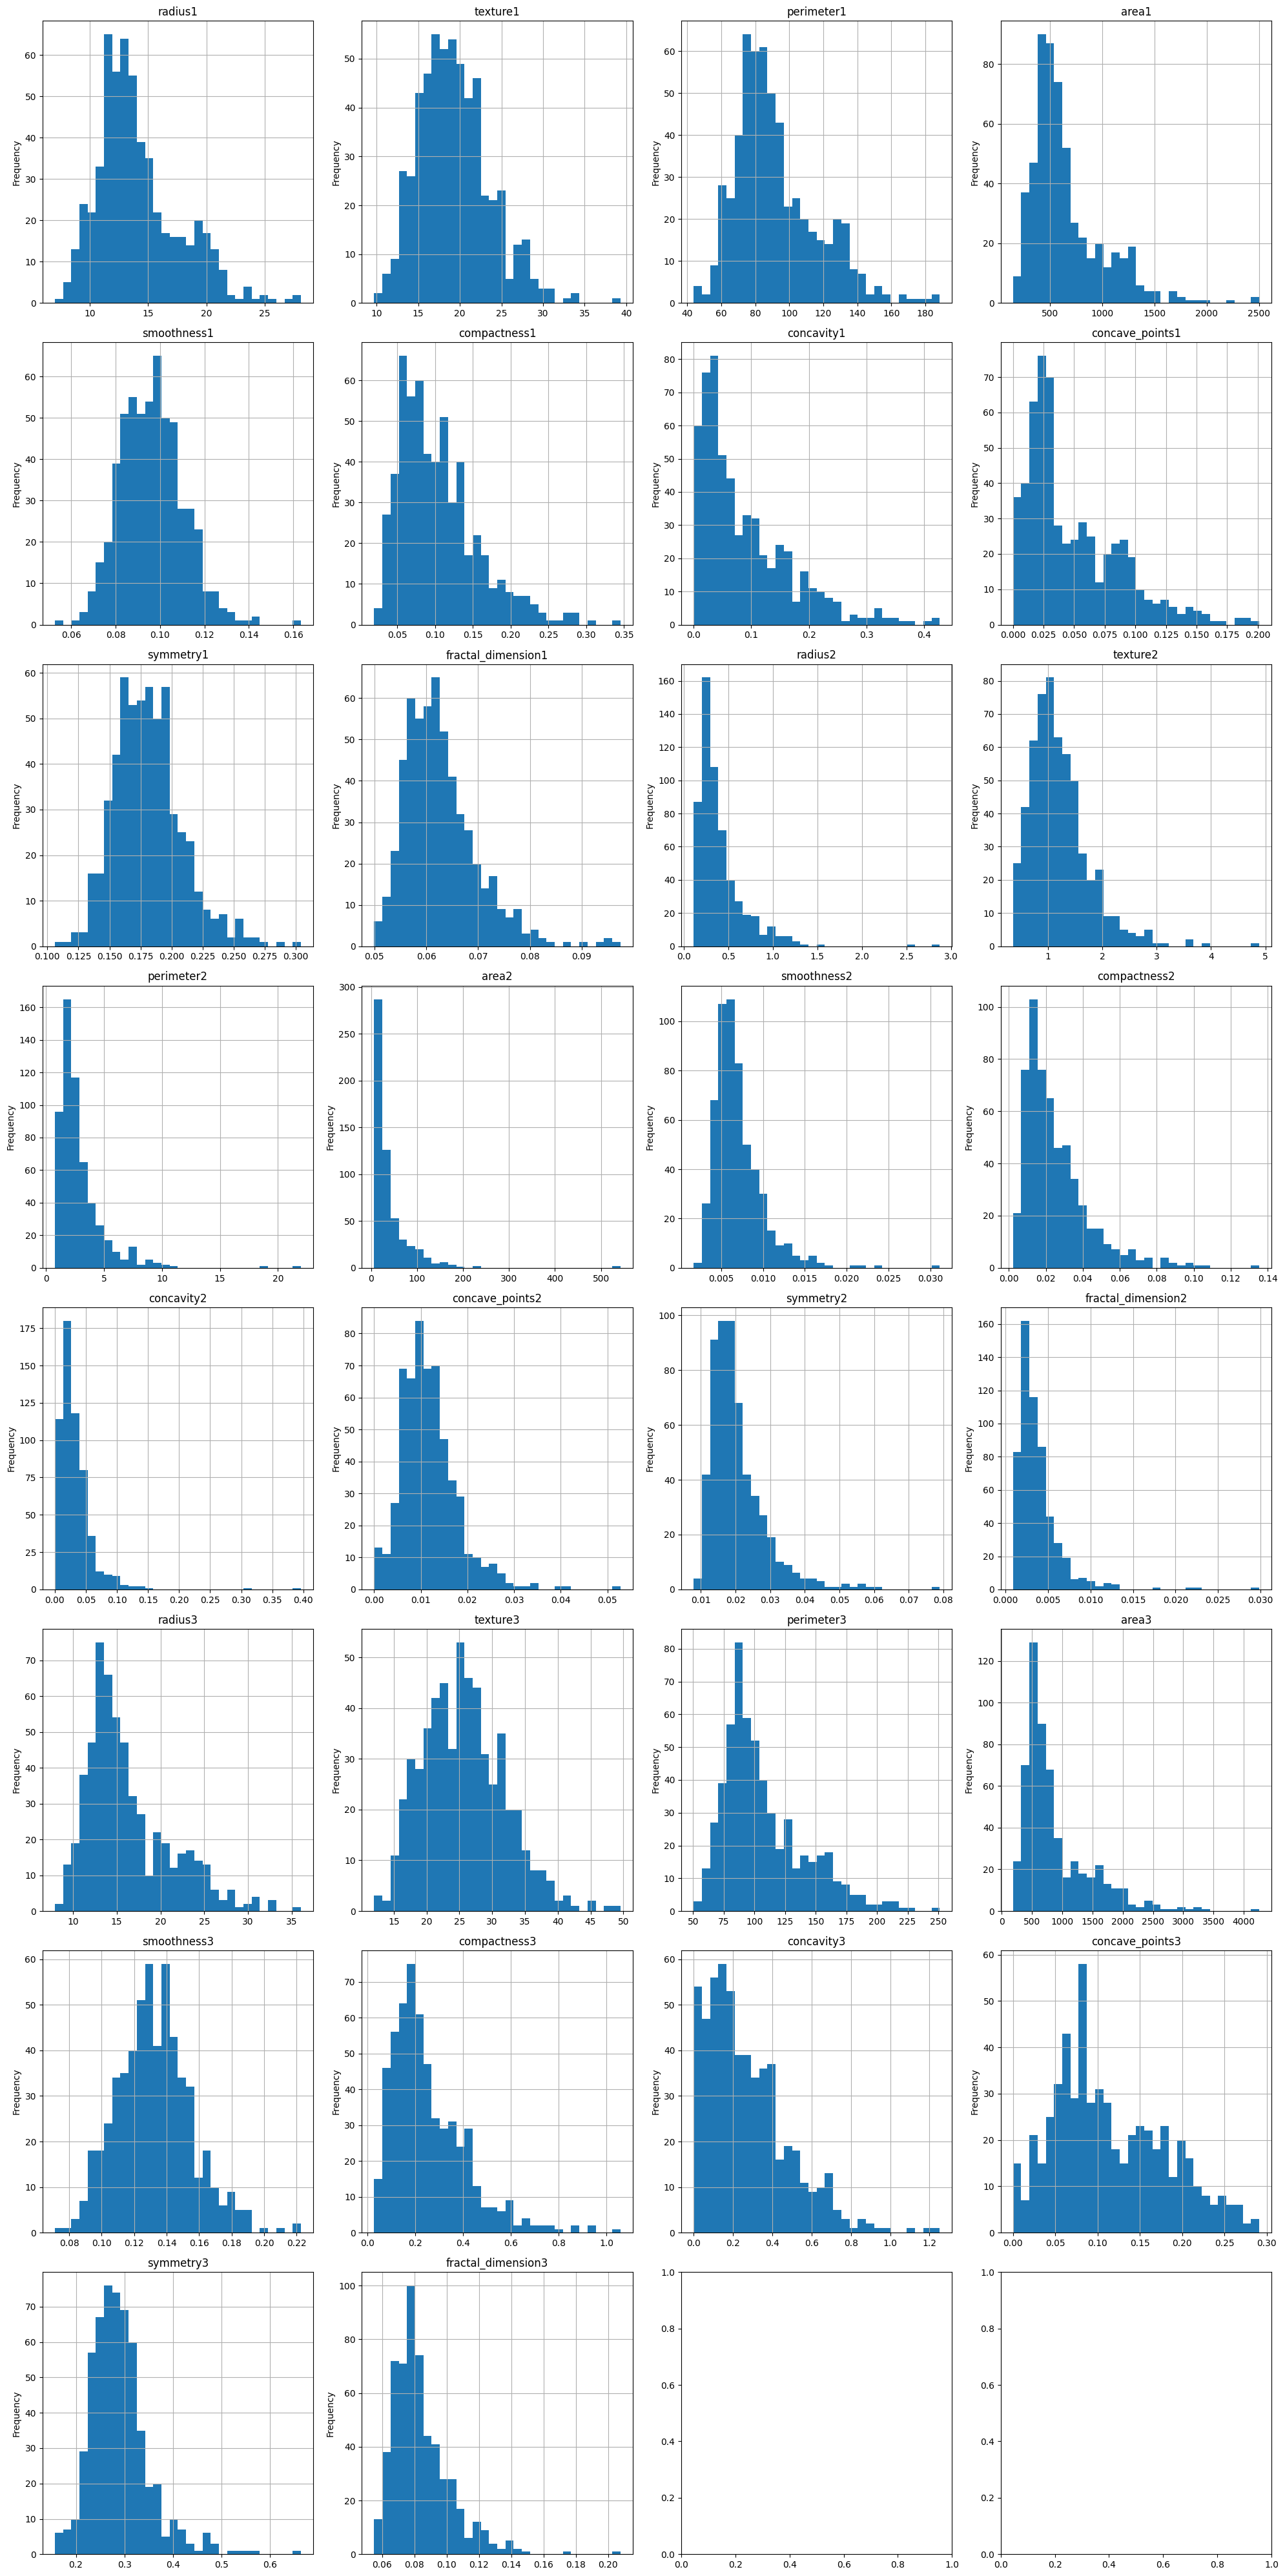

In [3]:
import matplotlib.pyplot as plt
import numpy as np
def analyze_dataframe(df):
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    n_cols = 4
    n_rows = (len(numerical_columns) - 1) // n_cols + 1

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

    for i, col in enumerate(numerical_columns):
        ax = axes[i // n_cols, i % n_cols]
        df[col].hist(ax=ax, bins=30)
        ax.set_title(col)
        ax.set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()
analyze_dataframe(X)

## Datan valmistelu
Seuraavaksi dataa muunnellaan paremmaksi karsimalla datasta huomattavasti poikkeavat arvot pois. Jos riviltä löytyy radikaalisti keskiarvosta poikkeava arvo, poistamme koko rivin, koska emme voi tietää ovatko muutkin arvot silloin oikeita. Hyvä esimerkki radikaalisti poikkeavasta arvosta on `area2` sarakkeen maksimiarvo, joka on suurempi kuin 500, kun sarakkeen keskiarvo on noin 40. Tässä kohdassa data myös standardisoidaan.

In [4]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

X = X[X.concavity2 < 0.2]
X = X[X.texture1 < 35]
X = X[X.area1 < 2000]
X = X[X.smoothness1 < 0.15]
X = X[X.compactness1 < 0.3]
X = X[X.symmetry1 < 0.28]
X = X[X.radius2 < 1.5]
X = X[X.texture2 < 3.5]
X = X[X.perimeter2 < 12]
X = X[X.area2 < 250]
X = X[X.smoothness2 < 0.02]
X = X[X.compactness2 < 0.12]
X = X[X.concavity2 < 0.2]
X = X[X.concave_points2 < 0.04]
X = X[X.symmetry2 < 0.07]
X = X[X.fractal_dimension2 < 0.015]
X = X[X.radius3 < 35]
X = X[X.perimeter3 < 240]
X = X[X.area3 < 3500]
X = X[X.compactness3 < 1]
X = X[X.concavity3 < 1]
X = X[X.symmetry3 < 0.6]
X = X[X.fractal_dimension3 < 0.16]

y = X["Diagnosis"]
X.drop(columns =['Diagnosis'], inplace=True)

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns) # preserves column names

Nyt kun kaikki poikkeavat arvot ovat poistettu, tarkistamme arvojen välisen korrelaation ja näytämme tuloksen lämpökartalla.

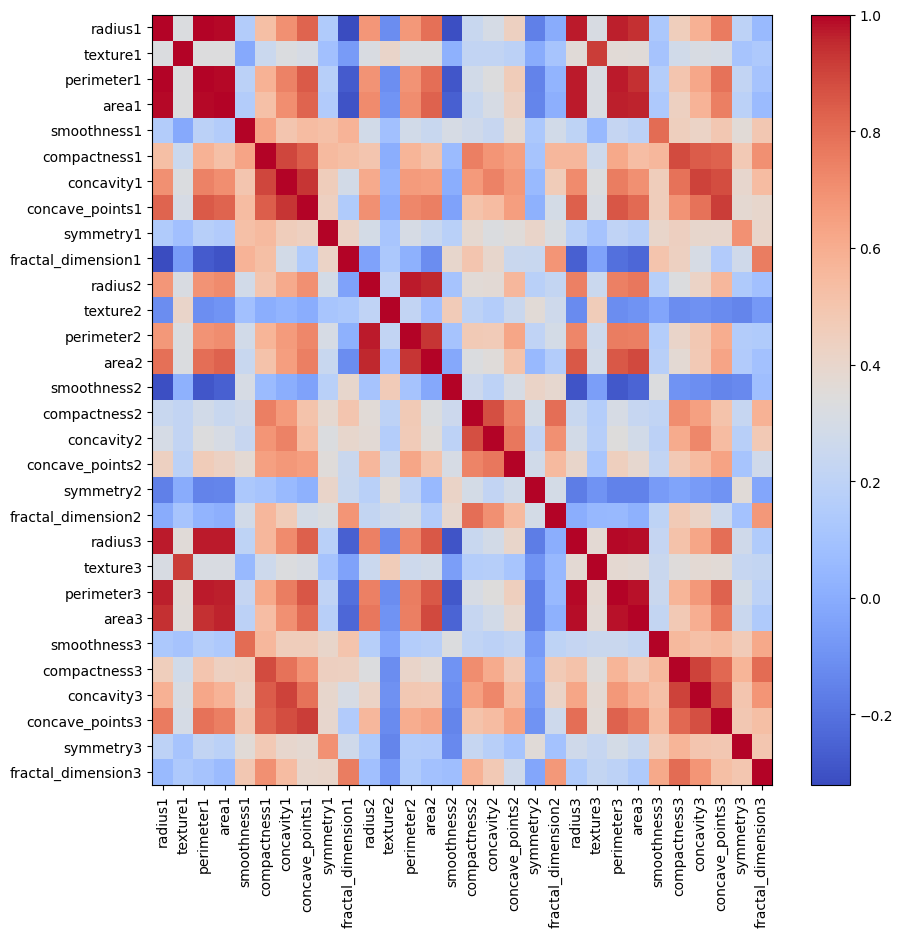

In [5]:
def plotCorr(df):
    corr = df.corr()
    plt.figure(figsize=(10, 10))
    plt.imshow(corr, cmap='coolwarm', interpolation='none', aspect='auto')
    plt.colorbar()
    plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr)), corr.columns)
    plt.show()

plotCorr(X)

Huomasimme että lämpökartta on massiivinen ja sitä on vaikea lukea. Lisäksi sarakkeet `1-3` tuntuvat jakavan samankaltaisen arvojen korrelaaton keskenään, joten jaoimme sarakkeet kolmeen omaan muuttujaan ja teemme jokaiselle oman korrelaation kuvan.

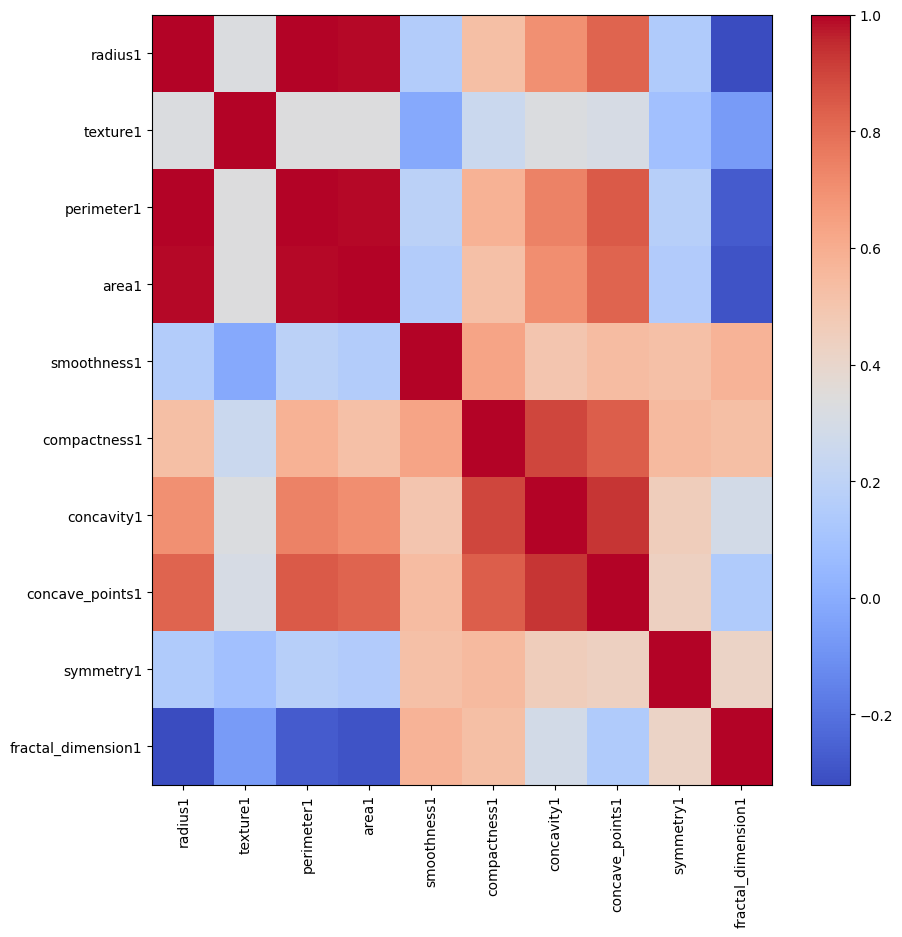

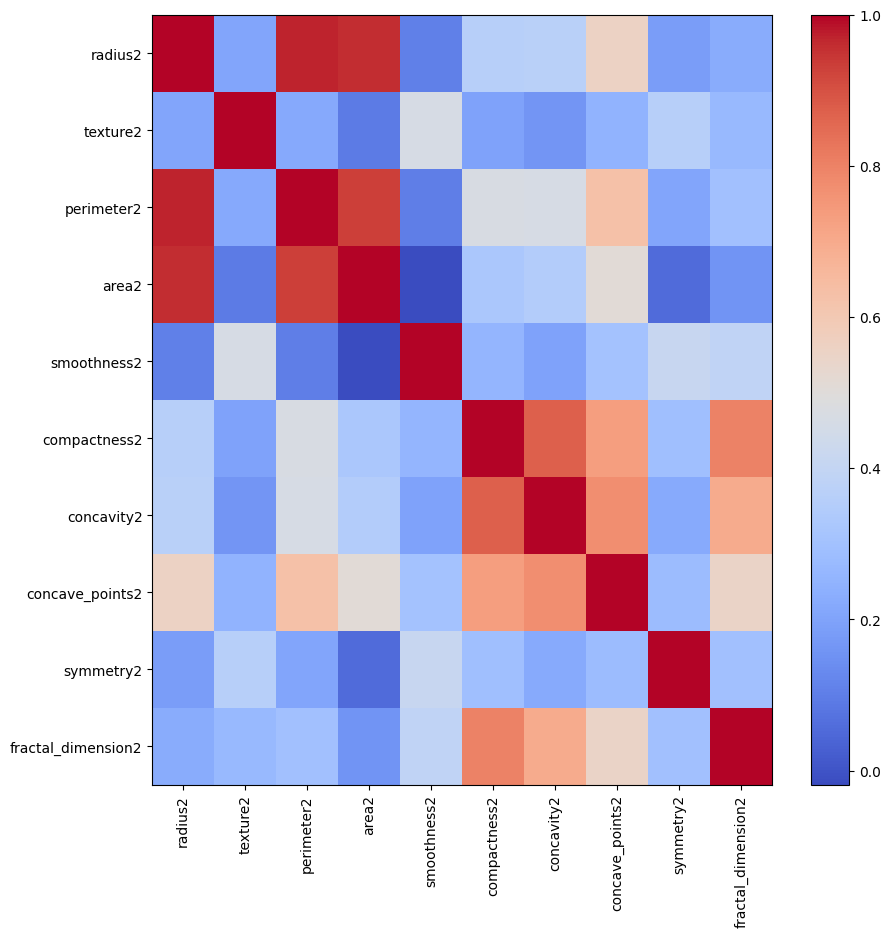

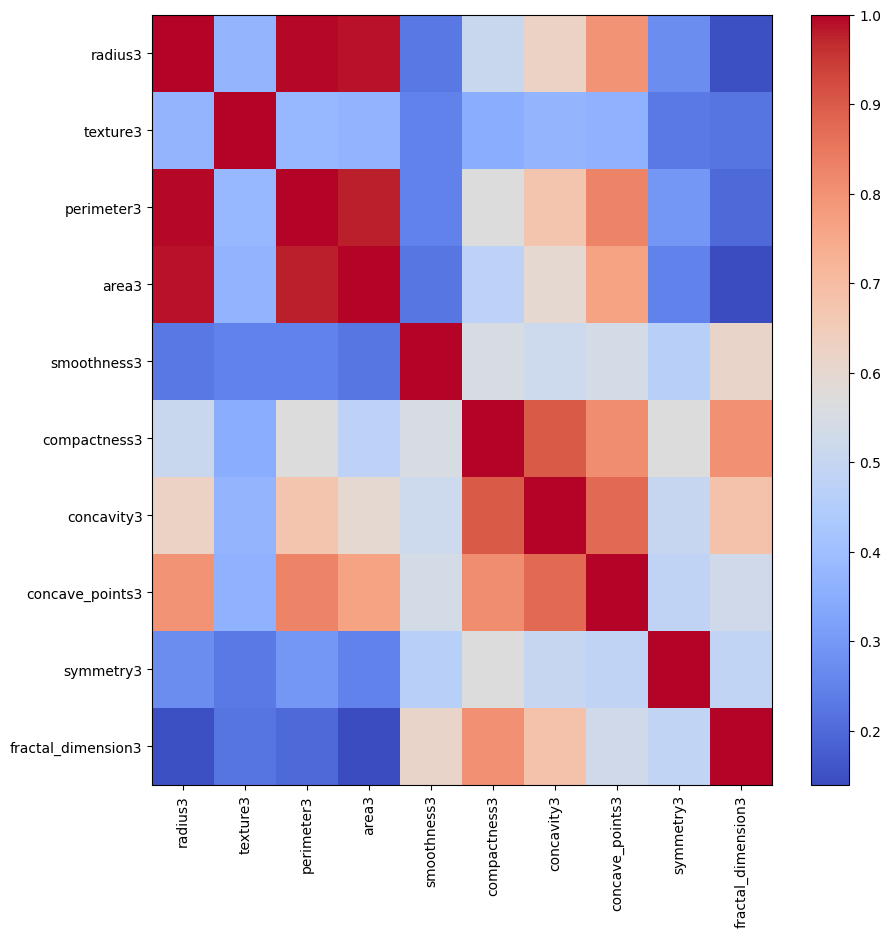

In [6]:
X1 = X[["radius1", "texture1", "perimeter1", "area1", "smoothness1", "compactness1", "concavity1", "concave_points1", "symmetry1", "fractal_dimension1"]]
X2 = X[["radius2", "texture2", "perimeter2", "area2", "smoothness2", "compactness2", "concavity2", "concave_points2", "symmetry2", "fractal_dimension2"]]
X3 = X[["radius3", "texture3", "perimeter3", "area3", "smoothness3", "compactness3", "concavity3", "concave_points3", "symmetry3", "fractal_dimension3"]]

plotCorr(X1)
plotCorr(X2)
plotCorr(X3)


## Datan mallinnus
Koneoppimismalli jota käytämme tähän analyysiin on kNN (k nearest neighbours). Jaamme kaikki kolme dataframea suhteella 30/70. 30% datasta tulee olemaan testidataa, ja loput 70% ovat koneoppimismallin opetusdataa. 

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay

def train_and_metrics(X, y, neighbors = 3):
    model = KNeighborsClassifier(n_neighbors = neighbors)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    cm = confusion_matrix(y_test, prediction)
    cmd = ConfusionMatrixDisplay(cm, display_labels=['Benign','Malignant'])
    cmd.plot()
    
    print(f"Accuracy of kNN classifier on the test set: {accuracy_score(y_test, prediction):.2f}")
    print(f"Precision of kNN classifier on the test set: {precision_score(y_test, prediction, pos_label='B'):.2f}")
    print(f"Recall of kNN classifier on the test set: {recall_score(y_test, prediction, pos_label='B'):.2f}")
    

Seuraavaksi generoidaan sekaannusmatriisi, jotta voimme tutkia mallimme ennusteiden oikeellisuutta.

Accuracy of kNN classifier on the test set: 0.93
Precision of kNN classifier on the test set: 0.91
Recall of kNN classifier on the test set: 0.98


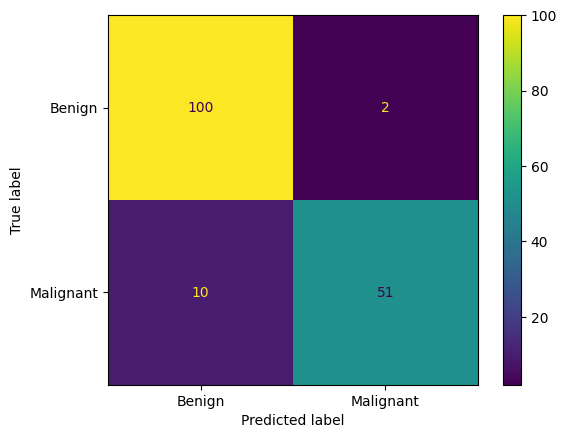

In [8]:
train_and_metrics(X1, y, 3)

Kuten näemme luodusta sekaannusmatriisista, mallin tarkkuus ei ole mitään täydellistä, mutta malli onnistui kuitenkin ennustamaan tuloksia 0.89% tarkkuudella. Seuraavaksi koulutetaan malli käyttämällä X2 ja X3 dataa.

Accuracy of kNN classifier on the test set: 0.81
Precision of kNN classifier on the test set: 0.83
Recall of kNN classifier on the test set: 0.88


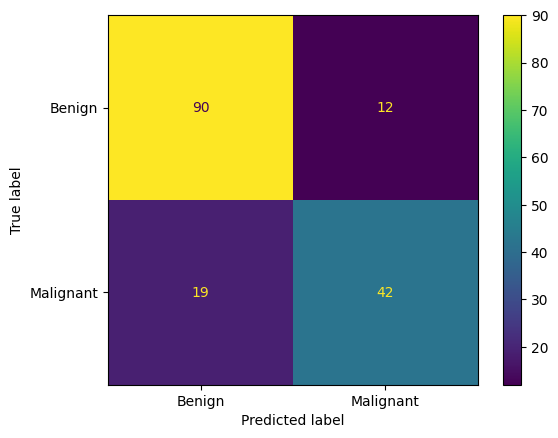

In [9]:
train_and_metrics(X2, y, 4)

Accuracy of kNN classifier on the test set: 0.96
Precision of kNN classifier on the test set: 0.95
Recall of kNN classifier on the test set: 0.99


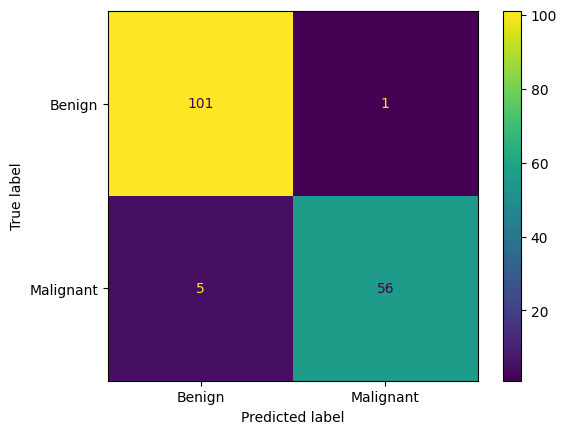

In [10]:
train_and_metrics(X3, y, 5)

## Arviointi
Tulosten perusteella voidaan sanoa, että koneoppimismalli on tuottanut hyviä tuloksia. Ennustusten oikeellisuus on korkea. Alussa asettamat tavoitteet ollaan saavutettu. Kaikista malleista malli, joka käytti X3 datasettia ja k=5- arvoa todistautui kaikista tarkimmaksi.

## Käyttöönotto
Tätä mallia voitaisi käyttää esimerkiksi sairaalassa, jossa diagnosoida syöpäpotilaita. Jos tätä mallia käytettäisiin työelämässä, sille pitäisi tehdä jokin sovellus, josta lääkäri voisi helposti tehdä ennusteita ja tutkia niitä. 